In [54]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import codecs
from konlpy.tag import Twitter
from konlpy.tag import Okt
from gensim.models import word2vec
from konlpy.utils import pprint
from sklearn.manifold import TSNE
import numpy as np

In [4]:
#파일 읽기 함수. 첫줄 헤더를 제외하고 한 줄씩 읽어서 data 에 담아서 리턴 한다.
def read_data(filename):
    with open(filename, encoding='utf-8', mode='r') as f:
        data = [line.split('\t') for line in f.read().splitlines()] #탭 기준으로 split
        data = data[1:]   # header 제외
    return data

ratings_train = read_data('data/ratings_train.txt')

In [5]:
ratings_train[0]

['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0']

In [8]:
okt = Okt()
def tokens(doc):# 하나의 문자열로 만들어 주는 함수
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)] 

In [9]:
tokens('아 더빙 진짜 짜증나네요 목소리')

['아/Exclamation', '더빙/Noun', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun']

In [10]:
# 파일중에서 영화 리뷰 데이타만 담기
docs = []
for row in ratings_train:
    docs.append(row[1])
print(docs[:10])

['아 더빙.. 진짜 짜증나네요 목소리', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '너무재밓었다그래서보는것을추천한다', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다', '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.', '원작의 긴장감을 제대로 살려내지못했다.', '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네', '액션이 없는데도 재미 있는 몇안되는 영화', '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?']


In [11]:
data = [tokens(d) for d in docs]

In [12]:
w2v_model = word2vec.Word2Vec(data)

In [13]:
w2v_model.save('naver.model')

In [14]:
vocabs = w2v_model.wv.vocab.keys()
print(vocabs)

dict_keys(['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun', '흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍다/Adjective', '않다/Verb', '너/Modifier', '다그/Noun', '래서/Noun', '보다/Verb', '추천/Noun', '한/Josa', '다/Adverb', '교도소/Noun', '이야기/Noun', '구먼/Noun', '솔직하다/Adjective', '재미/Noun', '는/Josa', '없다/Adjective', '평점/Noun', '조정/Noun', '사이/Modifier', '그/Determiner', '의/Noun', '익살스럽다/Adjective', '가/Josa', '돋보이다/Verb', '!/Punctuation', '스파이더맨/Noun', '에서/Josa', '늙다/Verb', '보이다/Verb', '하다/Verb', '너무나도/Adverb', '이쁘다/Adjective', '막/Noun', '걸음/Noun', '마/Noun', '떼다/Verb', '3/Number', '세/Noun', '부터/Josa', '초등학교/Noun', '1/Number', '학년/Noun', '생인/Noun', '8/Number', '살다/Verb', './Punctuation', 'ㅋㅋㅋ/KoreanParticle', '별/Modifier', '반개/Noun', '도/Josa', '아깝다/Adjective', '움/Noun', '원작/Noun', '의/Josa', '긴장감/Noun', '을/Josa', '제대로/Noun', '살리다/Verb', '별/Noun', '욕/Noun', '나오다/Verb', '이응경/Noun

In [16]:
print(w2v_model.wv.most_similar(positive=tokens(u'남자 여배우'), #남자 + 여배우 - 배우 = 여자    , 남자-배우 = 여자 -여배우
        negative=tokens(u'배우'), topn=5)) #topn은 순위내로 결과 출력

[('여자/Noun', 0.8114938735961914), ('여자애/Noun', 0.7222964763641357), ('아빠/Noun', 0.7041786909103394), ('고양이/Noun', 0.6873542070388794), ('여주/Noun', 0.6857314705848694)]


In [18]:
print(w2v_model.wv.most_similar(tokens('응원')))# 정우성 근처에 몰려있는 단어들

[('수고/Noun', 0.7725859880447388), ('발견/Noun', 0.7703721523284912), ('반성/Noun', 0.7588400840759277), ('존경/Noun', 0.743378221988678), ('추모/Noun', 0.7361240386962891), ('흥/Noun', 0.7291715145111084), ('준비/Noun', 0.6974600553512573), ('장악/Noun', 0.6881585121154785), ('화이팅/Noun', 0.6811074018478394), ('다짐/Noun', 0.6667648553848267)]


In [43]:
vocabs = w2v_model.wv.vocab.keys()
print(len(vocabs)) #15409개의 단어

15409


In [45]:
vocab = list(w2v_model.wv.vocab)
#print(vocab)

In [46]:
X = w2v_model[vocab]
print(X.shape) #(15409, 100) , 100차원의 데이터
print(X)

(15409, 100)
[[-1.1111602e-01  8.5969305e-01 -1.3366090e+00 ... -2.1045036e+00
   2.5984132e-01 -2.9167381e-01]
 [ 2.2557102e-01  9.8345721e-01  1.3597349e+00 ... -4.8236972e-01
  -2.8033778e-01  7.1988153e-01]
 [ 5.1345938e-01  2.1552756e-01 -4.5230100e-01 ... -2.4415739e-01
  -9.4309169e-01  1.9016089e-01]
 ...
 [ 2.7240790e-02  6.5379851e-02 -8.3761305e-02 ... -2.1539191e-02
   1.0835246e-01  1.2879819e-02]
 [-1.8654559e-02  2.0567537e-03 -9.6948802e-02 ... -4.8606358e-02
   5.7573162e-02  1.3175340e-02]
 [ 9.9748477e-02  2.2174789e-01 -4.1513538e-01 ...  5.5148299e-03
   6.2306732e-01 -1.3854331e-01]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [47]:
tsne = TSNE(n_components=2) #고차원을 저차원으로 변환 후 시각화 하는 함수

In [48]:
X_tsne = tsne.fit_transform(X[:300,:])

In [49]:
print(X_tsne.shape) #300개의 단어를 100 - > 2차원으로 변환
#print(X_tsne)

(300, 2)


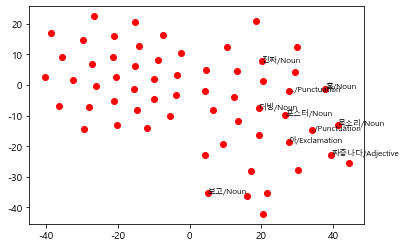

In [77]:
#한글지원해주는 모듈
from matplotlib import font_manager, rc
import matplotlib as mpl
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False # '-' 표시가 깨져서 나옴

plt.scatter(X_tsne[:,0], X_tsne[:,1], c='red')


words = vocab[:10]    
for i, word in enumerate(words):
    plt.text(X_tsne[i,0], X_tsne[i,1 ], word, fontsize=8) 
plt.savefig('out.png', dpi=200)


In [84]:
#실습, 할때마다 다르게 나온다.

group1 = w2v_model.wv.most_similar(tokens('짜증나다'), topn=30)
group1 = [w for ( w,  s )  in  group1 ]
X1 = w2v_model[group1]

group2 = w2v_model.wv.most_similar(tokens('정우성'), topn=30)
group2 = [w for ( w,  s )  in  group2 ]
X2 = w2v_model[group2]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


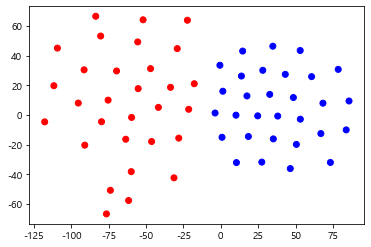

In [88]:
X_tsne =tsne.fit_transform(np.vstack([X1, X2])) # 60개의 데이터를 가지고 시각화 처리 진행, 초기값을 항상 랜덤으로 잡음

label = np.hstack([0*np.ones(30), np.ones(30)  ]) #앞에는 0 뒤에는 1
c = [ 'red'  if l == 0  else 'blue'  for l in label ]


plt.scatter(X_tsne[:,0], X_tsne[:,1], color=c)